Price = [9.10210898] * RM + -34.670620776438554
[29.04414209]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


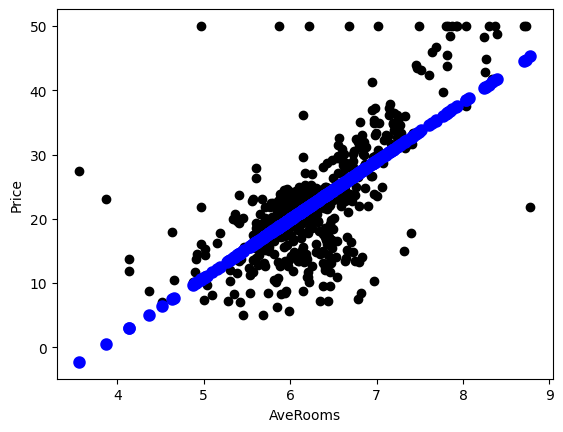

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets,linear_model,impute

dataset = datasets.fetch_openml(data_id=531)
# print(dataset.keys())
# print(dataset['DESCR'])
# dataset['target']

y = dataset['target']

X= dataset['data']
X=X.iloc[:,[5]]
# plt.scatter(X,y)
# plt.xlabel('RM')
# plt.ylabel('Price')
# plt.show()
model = linear_model.LinearRegression()

model.fit(X,y)

print('Price','=',model.coef_,'* RM','+',model.intercept_)
y_pred = model.coef_ * X + model.intercept_

plt.scatter(X,y,color = 'black')
plt.scatter(X,y_pred,color ="blue",linewidths=3)
plt.xlabel('AveRooms')
plt.ylabel('Price')
# plt.show()

# print(model.coef_ *7 + model.intercept_)
print(model.predict([[7]]))

['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT']
0
1
2
3
4
5
6
7
8
9
10
11
12


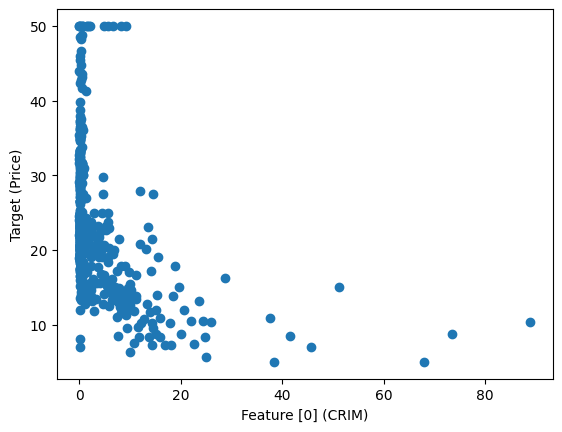

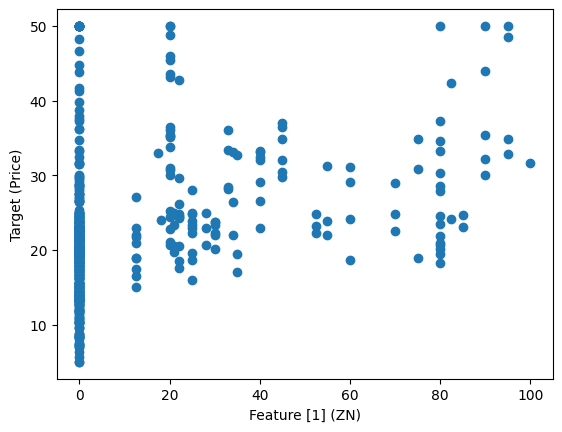

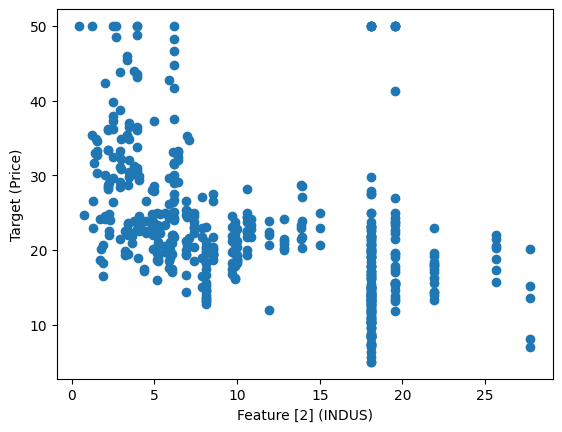

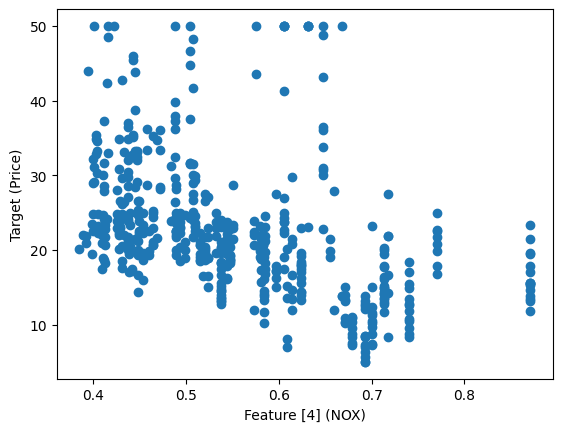

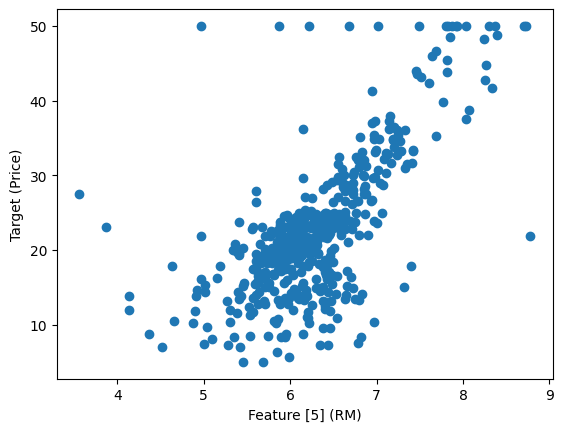

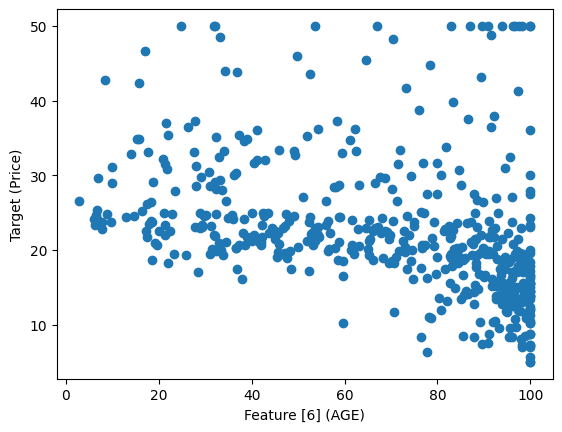

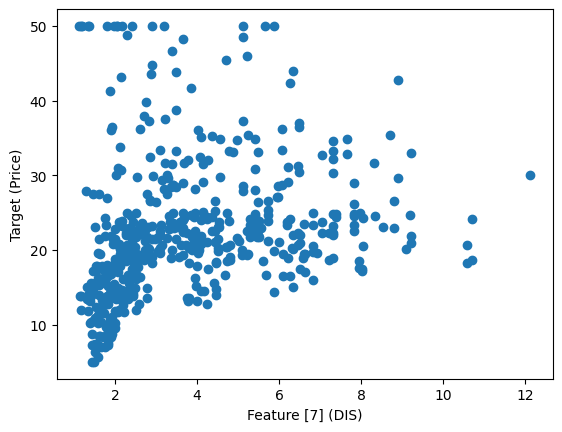

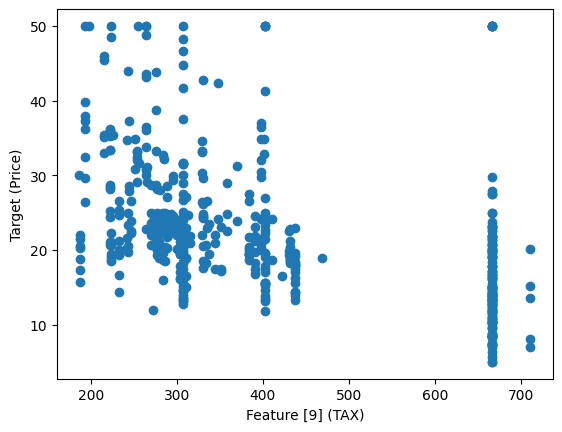

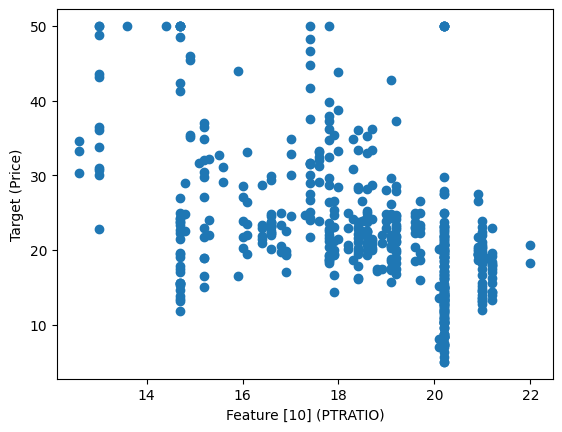

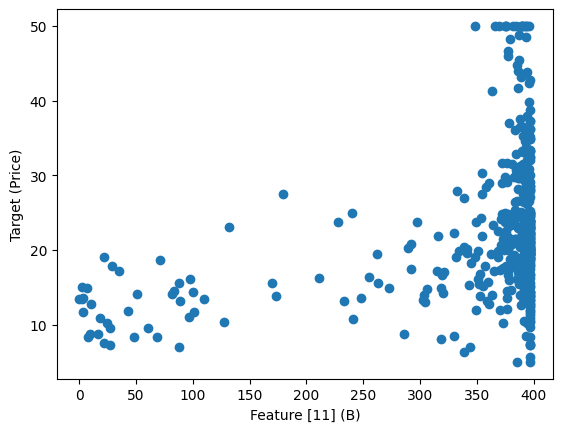

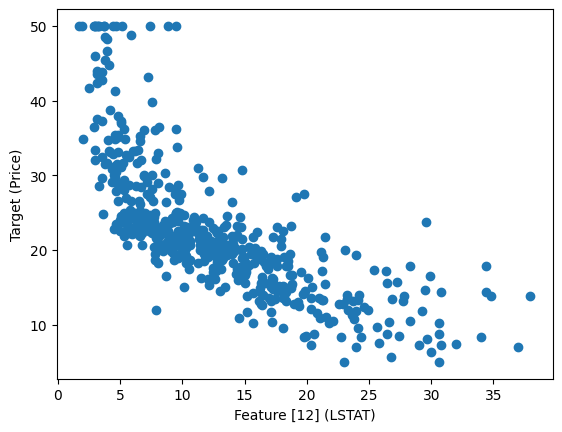

In [5]:
from sklearn import datasets
dataset = datasets.fetch_openml(data_id=531)
X = dataset['data']
y = dataset['target']
print(dataset['feature_names'])
for i in range(dataset['data'].shape[1]):
    print(i)
    data = dataset['data']
#     # X= data[:,[i]]
    X= data.iloc[:,[i]]
    y=dataset['target']
    if(i==3 or i==8):
        continue
    # print(X)

    fig,ax = plt.subplots()
    ax.scatter(X,y)
    ax.set_ylabel('Target (Price)')
    ax.set_xlabel('Feature ['+str(i)+'] ' + '('+ dataset['feature_names'][i]+')')

In [6]:
X=dataset['data'].iloc[:,[5,12]]
y=dataset['target']
model_2features =linear_model.LinearRegression()

model_2features.fit(X,y)

print('Price =' ,model_2features.coef_[0],'* RM + ',model_2features.coef_[1],'* LSTAT +',model_2features.intercept_ )

Price = 5.094787984336541 * RM +  -0.6423583342441288 * LSTAT + -1.3582728118744747


In [7]:
RM=7
LSTAT=2
print(model_2features.predict([[RM,LSTAT]]))

[33.02052641]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [8]:
from sklearn.preprocessing import PolynomialFeatures

y =dataset['target']
X= dataset['data'].iloc[:,[5]]

poly2 = PolynomialFeatures(degree=2,include_bias=False)

X_poly2 = poly2.fit_transform(X)

X_poly2


array([[ 6.575   , 43.230625],
       [ 6.421   , 41.229241],
       [ 7.185   , 51.624225],
       ...,
       [ 6.976   , 48.664576],
       [ 6.794   , 46.158436],
       [ 6.03    , 36.3609  ]])

Text(0, 0.5, 'Price')

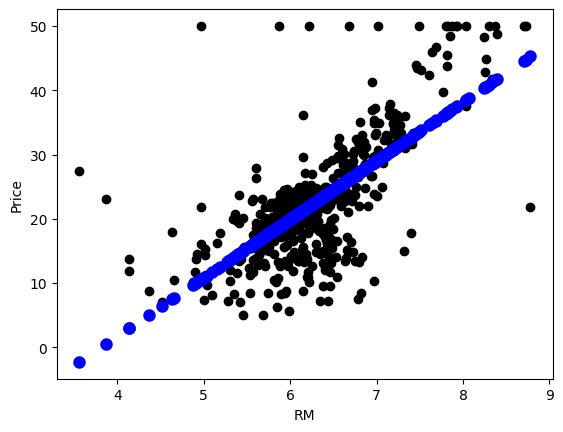

In [9]:
model_poly2 = linear_model.LinearRegression()

model_poly2.fit(X_poly2,y)
plt.scatter(X,y,color = 'black')
plt.scatter(X,y_pred,color ="blue",linewidths=3)
plt.xlabel('RM')
plt.ylabel('Price')

In [10]:
print(model_poly2.coef_,model_poly2.intercept_)

[-22.64326237   2.47012384] 66.05884748479389


In [11]:
new_X = [[7]]
new_X_transformed = poly2.transform(new_X)
model_poly2.predict(new_X_transformed)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


array([28.59207922])

In [28]:
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error
from collections import OrderedDict

RAND_STATE = 1234

X=dataset['data'].iloc[:,[12]].values
y = dataset['target']

X

array([[ 4.98],
       [ 9.14],
       [ 4.03],
       [ 2.94],
       [ 5.33],
       [ 5.21],
       [12.43],
       [19.15],
       [29.93],
       [17.1 ],
       [20.45],
       [13.27],
       [15.71],
       [ 8.26],
       [10.26],
       [ 8.47],
       [ 6.58],
       [14.67],
       [11.69],
       [11.28],
       [21.02],
       [13.83],
       [18.72],
       [19.88],
       [16.3 ],
       [16.51],
       [14.81],
       [17.28],
       [12.8 ],
       [11.98],
       [22.6 ],
       [13.04],
       [27.71],
       [18.35],
       [20.34],
       [ 9.68],
       [11.41],
       [ 8.77],
       [10.13],
       [ 4.32],
       [ 1.98],
       [ 4.84],
       [ 5.81],
       [ 7.44],
       [ 9.55],
       [10.21],
       [14.15],
       [18.8 ],
       [30.81],
       [16.2 ],
       [13.45],
       [ 9.43],
       [ 5.28],
       [ 8.43],
       [14.8 ],
       [ 4.81],
       [ 5.77],
       [ 3.95],
       [ 6.86],
       [ 9.22],
       [13.15],
       [14.44],
       [

In [13]:
errors_train = OrderedDict()
errors_val=OrderedDict()
poly=OrderedDict()
models= OrderedDict()

In [30]:
for deg in range(1,13):
    model_name = 'poly'+str(deg)
    poly[model_name] = PolynomialFeatures(degree=deg,include_bias=False)

    # Cross-validation
    errors_train[model_name]=[]
    errors_val[model_name]=[]
    kf = KFold(n_splits=5,shuffle=True,random_state=RAND_STATE)
    # print(kf.split(X))
    for train_index,val_index in kf.split(X,):
        # print(train_index,val_index)
        X_train,X_val = X[train_index],X[val_index]
        y_train,y_val = y[train_index],y[val_index]

        #split the data
        X_train_poly = poly[model_name].fit_transform(X_train)
        X_val_poly = poly[model_name].transform(X_val)

        #initiate a liner model
        model = linear_model.LinearRegression()
        #train the model
        model.fit(X_train_poly,y_train)

        models[model_name] = model

        #Evaluate on training set
        y_train_pred = model.predict(X_train_poly)
        mse = mean_squared_error(y_train,y_train_pred)
        errors_train[model_name].append(mse)

        #Evaluate on the validation set
        y_val_pred = model.predict(X_val_poly)
        mse = mean_squared_error(y_val,y_val_pred)
        errors_val[model_name].append(mse)

Text(0, 0.5, 'MSE')

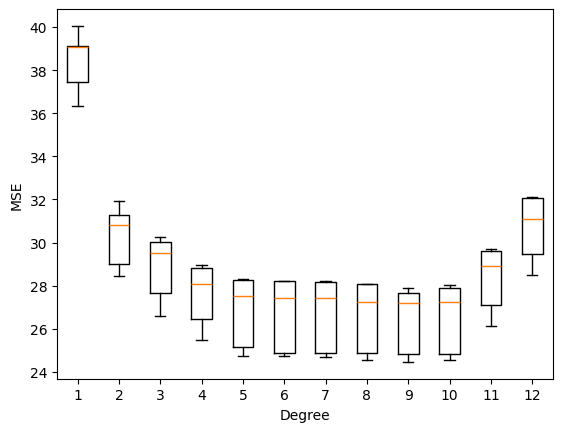

In [31]:
bp_train = plt.boxplot(errors_train.values())
plt.xlabel('Degree')
plt.ylabel('MSE')

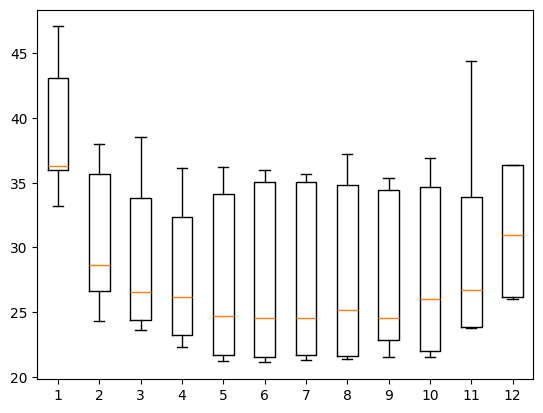

In [32]:
bp_val =plt.boxplot(errors_val.values(),showfliers=False)

Text(0, 0.5, 'MSE Average')

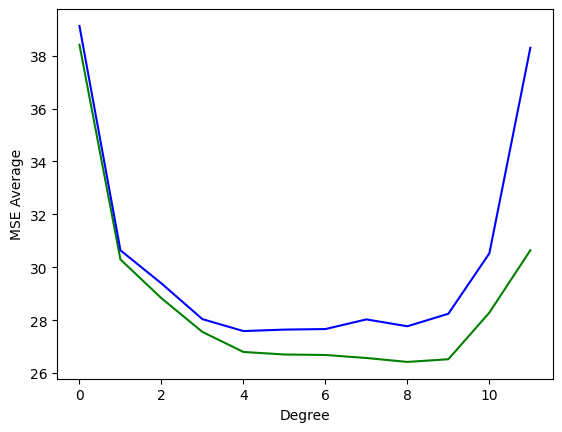

In [33]:
mse_means_train =[]
for model_name,errors in errors_train.items():
    mse_means_train+=[np.mean(errors)]

mse_means_val = []
for model_name,errors in errors_val.items():
    mse_means_val += [np.mean(errors)]

_ = plt.plot(mse_means_train,c='g')
_ = plt.plot(mse_means_val,c='b')
plt.xlabel('Degree')
plt.ylabel('MSE Average')

Text(0, 0.5, 'Price')

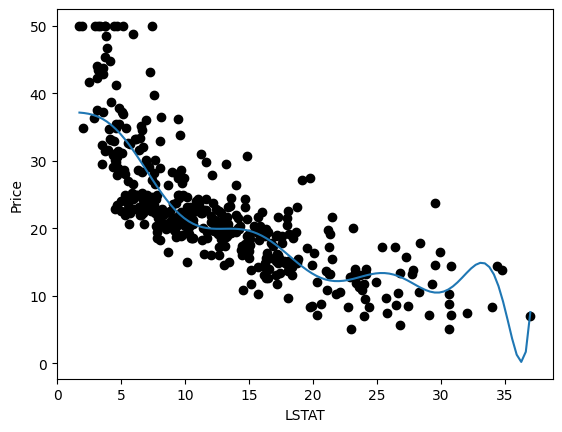

In [36]:
model_name = 'poly12'

fig,ax =plt.subplots()
ax.scatter(X_train,y_train,c='black')
X_model = np.linspace(start=min(X_train),stop=max(X_train),num=100).reshape([100,-100])
ax.plot(X_model,models[model_name].predict(poly[model_name].transform(X_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')

Text(0, 0.5, 'Price')

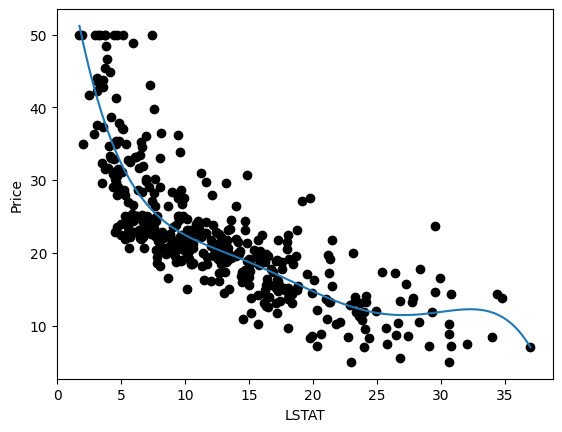

In [37]:
model_name = 'poly5'

fig,ax =plt.subplots()
ax.scatter(X_train,y_train,c='black')
X_model = np.linspace(start=min(X_train),stop=max(X_train),num=100).reshape([100,-100])
ax.plot(X_model,models[model_name].predict(poly[model_name].transform(X_model)))
ax.set_xlabel('LSTAT')
ax.set_ylabel('Price')